In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('CustomerLoyaltyAndSatisfaction.csv')

In [6]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


<function matplotlib.pyplot.show(close=None, block=None)>

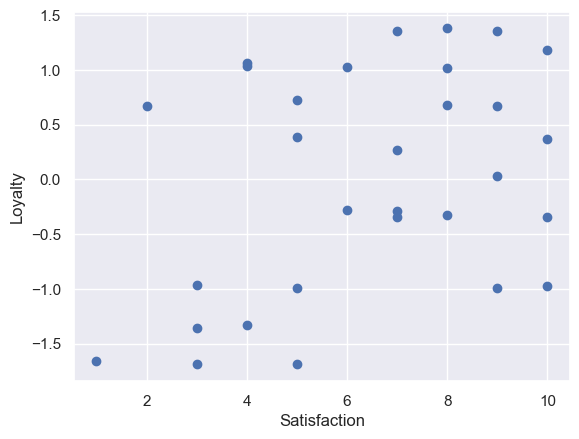

In [8]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show

#At first glance, it looks like there are 2 clusters i.e. bottom part and top part of the graph. However, this does not give me
any clear and actionable insights. Nevertheless, I will try to create a cluster of 2 and see what happens....

In [14]:
x = data.copy()

In [16]:
#clustering
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [18]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 'auto',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [20]:
#clustering the results
clusters = x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

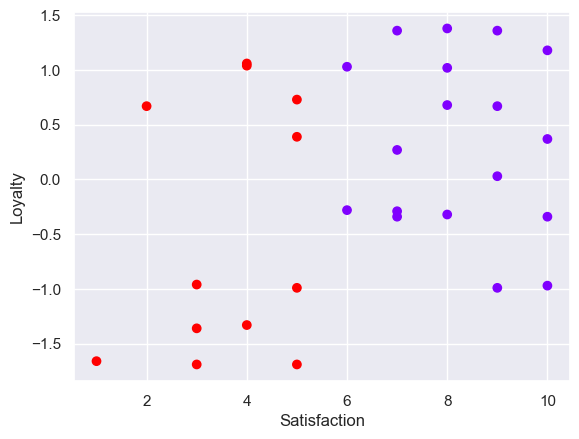

In [22]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

The clusters are low and high satisfaction. Loyalty has been ignored, probably because it has smaller numbers than satisfaction. To fix this, satisfaction must be standardized. Loyalty seems to have a mean of 0 and SD of 1. If that is the case, there is no need to standardize it.

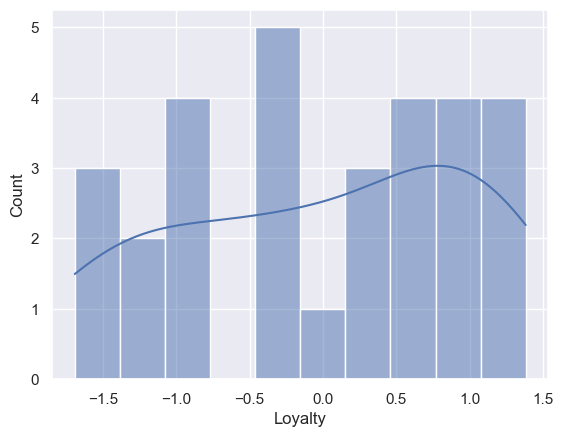

In [25]:
#check distribution of loyalty.

import seaborn as sns

sns.histplot(data['Loyalty'], kde=True, bins=10)
plt.show()


In [27]:
#Check mean and SD value of loyalty.

# Convert column to NumPy array
values = data['Loyalty'].values

# Mean and Standard Deviation
mean_value = np.mean(values)
std_value = np.std(values, ddof=1)  # ddof=1 for sample SD (like Pandas), use ddof=0 for population SD

print(f"Mean: {mean_value:.2f}")
print(f"Standard Deviation: {std_value:.2f}")


Mean: 0.00
Standard Deviation: 1.02


Now that I have confirmed the mean and SD of loyalty to be 0 and 1 respectively, i can go ahead and standardise Satisfaction.

In [30]:
# standardize satisfaction

from sklearn import preprocessing
x_scaled = preprocessing.scale(x)

In [32]:
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [34]:
#Use elbow method to determine how many clusters must be created.
wcss= []

for i in range(1,10):                  #I arbitrailly chose 10 so we get up to 9 clusture solutions
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)               #x_scaled since we standardised x
   

In [36]:
wcss.append(kmeans.inertia_)

In [38]:
wcss

[4.154092951861185]

In [40]:
#it looks like 4 clusters would be good.

In [50]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [52]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,2
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


Text(0, 0.5, 'Loyalty')

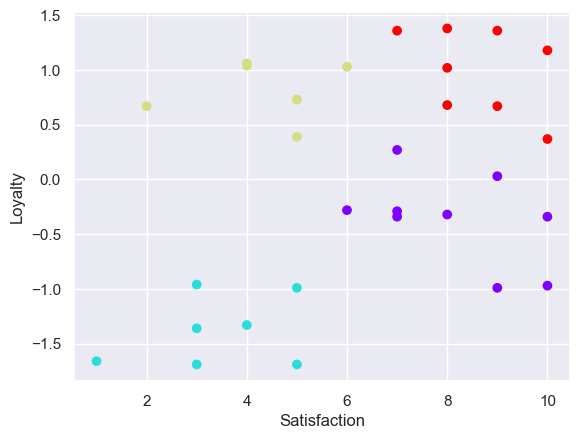

In [54]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

Since this is unsupervised ML, I need to name the clusters. 
Blue- Disloyal/unsatisfied.
Green- Dissatisfied but loyal.
Red- Happy customers (since they are loyal and satisfied).
Purple- Satisfied/Disloyal.



In [61]:
#to export the data to a CSV file

# Creating the DataFrame
data = pd.DataFrame({
    'Satisfaction': [4, 6, 5, 7, 4, 1, 10, 8, 8, 8, 10, 5, 5, 2, 7, 9, 8, 7, 7, 9, 10, 3, 4, 3, 6, 9, 10, 9, 3, 5],
    'Loyalty': [-1.33, -0.28, -0.99, -0.29, 1.06, -1.66, -0.97, -0.32, 1.02, 0.68, -0.34, 0.39, -1.69, 0.67, 0.27, 1.36, 1.38, 1.36, -0.34, 0.67, 1.18, -1.69, 1.04, -0.96, 1.03, -0.99, 0.37, 0.03, -1.36, 0.73],
    'cluster_pred': [1, 0, 1, 0, 2, 1, 0, 0, 3, 3, 0, 2, 1, 2, 0, 3, 3, 3, 0, 3, 3, 1, 2, 1, 2, 0, 3, 0, 1, 2]
})

# View the first few rows
print(data.head())



   Satisfaction  Loyalty  cluster_pred
0             4    -1.33             1
1             6    -0.28             0
2             5    -0.99             1
3             7    -0.29             0
4             4     1.06             2


In [63]:
# Save as CSV file
data.to_csv("kmeans_results.csv", index=False)

print("Data saved to 'kmeans_results.csv'")


Data saved to 'kmeans_results.csv'
